# Finding the Treasure
##### Members:
###### Bazar, Jayp
###### Asiado, Jayson
###### Cuadra, Hamzah

##### Description: The main task of the program is find the path from the starting island to the island where the treasure is located in the shortest time possible. We are pirates looking for treasure that is located on the last island of grand line. We have one starting island connected with many different islands in which one island contains the path to the goal. We are going to the last island using the Greedy Best-First Search by choosing the island with the shortest distance to the current island. The worst case scenario is when we travelled through so many island delaying our exploration.

### Import Libraries

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

### Creating a Node class

In [52]:
class Node():
    def __init__(self, state, parent, hn=0):
        self.state = state
        self.parent = parent
        self.action = []
        self.hn = hn
    
    def add_action(self, action):
        self.action.append(action)
        return ((self.state, action.state), action.hn)

    def actions(self):
        for action in self.action:
            print(action.name, end =" ")

### Greedy Best First Search Class

In [53]:
class GBFS():
    def __init__(self):
        self.frontier = []

    def add(self, node):
        self.frontier.append(node)

    def contains_state(self, state):
        return any(node.state == state for node in self.frontier)

    def empty(self):
        return len(self.frontier) == 0

    def remove(self):
        c=float('inf')
        if self.empty():
            raise Exception("empty frontier")
        else:
            for node in self.frontier:
                if(node.hn < c):
                    index = self.frontier.index(node)
                    c=node.hn
        return self.frontier.pop(index)

### Creating Islands represented by Nodes

In [54]:
Island_A = Node(state="A", parent=None, hn=0)
Island_B = Node(state="B", parent=Island_A, hn=3)
Island_C = Node(state="C", parent=Island_A, hn=5)
Island_D = Node(state="D", parent=Island_A, hn=6)
Island_E = Node(state="E", parent=Island_B, hn=4)
Island_F = Node(state="F", parent=Island_B, hn=7)
Island_G = Node(state="G", parent=Island_C, hn=7)
Island_H = Node(state="H", parent=Island_C, hn=8)
Island_I = Node(state="I", parent=Island_D, hn=6)
Island_J = Node(state="J", parent=Island_D, hn=10)
Island_K = Node(state="K", parent=Island_E, hn=3)
Island_L = Node(state="L", parent=Island_H, hn=12)
Island_M = Node(state="M", parent=Island_F, hn=18)
Island_N = Node(state="N", parent=Island_J, hn=11)
Island_O = Node(state="O", parent=Island_J, hn=9)
Island_P = Node(state="P", parent=Island_M, hn=6)
Island_Q = Node(state="Q", parent=Island_M, hn=4)
Island_R = Node(state="R", parent=Island_N, hn=13)
Island_S = Node(state="S", parent=Island_N, hn=16)
Island_T = Node(state="T", parent=Island_L, hn=17)
Island_U = Node(state="U", parent=Island_L, hn=14)
Island_V = Node(state="V", parent=Island_R, hn=15)
Island_W = Node(state="W", parent=Island_R, hn=18)
Island_X = Node(state="X", parent=Island_T, hn=19)
Island_Y = Node(state="Y", parent=Island_T, hn=20)
Island_Z = Node(state="Z", parent=Island_V, hn=13)

### Initializing a Graph

In [55]:
G=nx.DiGraph()

pcost=dict([
    Island_A.add_action(Island_B),
    Island_A.add_action(Island_C),
    Island_A.add_action(Island_D),
    Island_B.add_action(Island_E),
    Island_B.add_action(Island_F),
    Island_C.add_action(Island_G),
    Island_C.add_action(Island_H),
    Island_D.add_action(Island_I),
    Island_D.add_action(Island_J),
    Island_E.add_action(Island_K),
    Island_H.add_action(Island_L),
    Island_J.add_action(Island_N),
    Island_J.add_action(Island_O),
    Island_M.add_action(Island_P),
    Island_M.add_action(Island_Q),
    Island_N.add_action(Island_R),
    Island_N.add_action(Island_S),
    Island_L.add_action(Island_T),
    Island_L.add_action(Island_U),
    Island_T.add_action(Island_X),
    Island_T.add_action(Island_Y),
    Island_R.add_action(Island_V),
    Island_R.add_action(Island_W),
    Island_V.add_action(Island_Z)
])

### Adding Actions

In [56]:
G.add_edges_from(pcost.keys())

### Drawing Actions

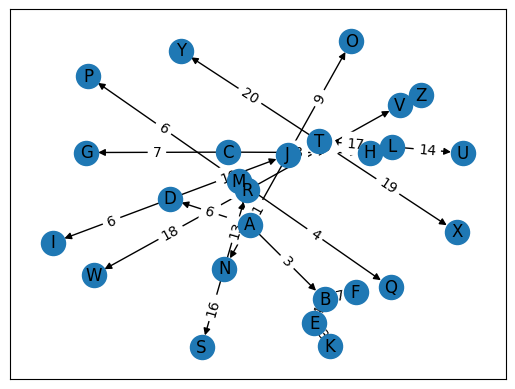

In [76]:
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=pcost)   
plt.show()

### Important Variables

In [67]:
#setting the goal
goal = Island_Z

#empty solution
solution = []

#empty frontier (can be changed to DFS or BFS)
frontier = GBFS()

#empty explored set
explored = []

#add the initial state to the frontier
frontier.add(Island_A)

In [68]:
while True:
    #if the frontier is empty, then no solution
    if frontier.empty():
        raise Exception("no solution")

    #remove a node from the frontier
    print("frontier: ", end="")
    for front in frontier.frontier:
        print(front.state, end=", ")
    node = frontier.remove()
    print("\nremove: "+node.state)
    
    
    solution.append(node.state)

    #if node contains goal state, return the solution
    if goal.state == node.state:
        print("[SOLVED]:" + str(solution))
        break

    #adding to the explored set
    explored.append(node)
    print("explored: ", end="")
    for exp in explored:
        print(exp.state, end=", ")

    #expanding the node and adding the resulting node/s to the frontier
    print("\npossible action: ", end="")
    for action in node.action:
        if not frontier.contains_state(action) and action not in explored:
            print(action.state, end=", ")
            frontier.add(action)
        else:
            print("nah")
    print("\n\n")

frontier: A, 
remove: A
explored: A, 
possible action: B, C, D, 


frontier: B, C, D, 
remove: B
explored: A, B, 
possible action: E, F, 


frontier: C, D, E, F, 
remove: E
explored: A, B, E, 
possible action: K, 


frontier: C, D, F, K, 
remove: K
explored: A, B, E, K, 
possible action: 


frontier: C, D, F, 
remove: C
explored: A, B, E, K, C, 
possible action: G, H, 


frontier: D, F, G, H, 
remove: D
explored: A, B, E, K, C, D, 
possible action: I, J, 


frontier: F, G, H, I, J, 
remove: I
explored: A, B, E, K, C, D, I, 
possible action: 


frontier: F, G, H, J, 
remove: F
explored: A, B, E, K, C, D, I, F, 
possible action: 


frontier: G, H, J, 
remove: G
explored: A, B, E, K, C, D, I, F, G, 
possible action: 


frontier: H, J, 
remove: H
explored: A, B, E, K, C, D, I, F, G, H, 
possible action: L, 


frontier: J, L, 
remove: J
explored: A, B, E, K, C, D, I, F, G, H, J, 
possible action: N, O, 


frontier: L, N, O, 
remove: O
explored: A, B, E, K, C, D, I, F, G, H, J, O, 
possible 